In [31]:
import math

from ultralytics import YOLO
import cv2
import cvzone
from matplotlib import pyplot as plt

In [32]:
model = YOLO("yolov9t.pt")  # Load the YOLO model

In [33]:

coco_names = [
    "person",
    "bicycle",
    "car",
    "motorbike",
    "aeroplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "sofa",
    "pottedplant",
    "bed",
    "diningtable",
    "toilet",
    "tvmonitor",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]


In [34]:
import cv2
import numpy as np

def detect_apple_color(image, x1, y1, x2, y2):
    """
    Determines if the fruit in the bounding box is Red, Green, or Red_and_Green.
    Uses HSV masking and average BGR analysis.
    """
    # Crop the region of interest (ROI)
    roi = image[int(y1):int(y2), int(x1):int(x2)]

    # Convert to HSV for red masking
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Create masks for red color (both ends of the hue spectrum)
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    mask1 = cv2.inRange(hsv_roi, lower_red1, upper_red1)

    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv_roi, lower_red2, upper_red2)

    # Combine red masks
    red_mask = mask1 + mask2

    # Find the largest red area
    contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Crop red region inside ROI
        red_region = roi[y:y+h, x:x+w]

        # Calculate average BGR color of the red region
        avg_color = cv2.mean(red_region)[:3]
    else:
        # No red area found, use entire ROI
        avg_color = cv2.mean(roi)[:3]

    b, g, r = avg_color

    # Simple decision logic
    if r > g and r > b:
        return "red"
    elif g > r and g > b:
        return "green"
    else:
        return "red_and_green"


In [35]:
def apple_weight_prediction(height, width, color):
    import scaler_utils_for_apple as su_apple
    min_vals = su_apple.min_vals
    scale_vals = su_apple.scale_vals
    
    scaled_height = (height - min_vals[0]) / scale_vals[0]
    scaled_width = (width - min_vals[1]) / scale_vals[1]
    
    if color == "Red":
        red, green = 1, 0
    elif color == "Green":
        red, green = 0, 1
    else:
        red, green = 0, 0

    apple_info = [scaled_height, scaled_width, red, green]
    
    import joblib
    model = joblib.load("../Trained_model/Weights_Prediction_Apple")
    
    result = model.predict([apple_info])
    return result
    

In [36]:
import cv2
import numpy as np

def detect_banana_color(image, x1, y1, x2, y2):
    """
    Detects the color of a banana in the given bounding box.
    Returns: 'yellow', 'green', or 'yellow_and_green'
    """
    roi = image[int(y1):int(y2), int(x1):int(x2)]
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Yellow color range in HSV
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([35, 255, 255])
    yellow_mask = cv2.inRange(hsv_roi, lower_yellow, upper_yellow)

    # Green color range in HSV
    lower_green = np.array([35, 100, 100])
    upper_green = np.array([85, 255, 255])
    green_mask = cv2.inRange(hsv_roi, lower_green, upper_green)

    yellow_pixels = cv2.countNonZero(yellow_mask)
    green_pixels = cv2.countNonZero(green_mask)

    if yellow_pixels > green_pixels and yellow_pixels > 200:
        return "yellow"
    elif green_pixels > yellow_pixels and green_pixels > 200:
        return "green"
    else:
        return "yellow_and_green"

In [37]:
def banana_weight_prediction(height, width, color):
    import scaler_utils_for_banana as su_banana
    min_vals = su_banana.min_vals
    scale_vals = su_banana.scale_vals
    
    scaled_height = (height - min_vals[0]) / scale_vals[0]
    scaled_width = (width - min_vals[1]) / scale_vals[1]
    
    if color == "yellow":
        red, green = 1, 0
    elif color == "Green":
        red, green = 0, 1
    else:
        red, green = 0, 0

    banana_info = [scaled_height, scaled_width, red, green]
    
    import joblib
    model = joblib.load("../Trained_model/Weights_Prediction_Banana")
    
    result = model.predict([banana_info])
    return result
    

In [38]:
import cv2
import numpy as np

def detect_carrot_color(image, x1, y1, x2, y2):
    """
    Detects the color of a carrot in the given bounding box.
    Returns: 'orange', 'purple', or 'yellow'
    """
    roi = image[int(y1):int(y2), int(x1):int(x2)]
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Orange color range
    lower_orange = np.array([10, 100, 100])
    upper_orange = np.array([25, 255, 255])
    orange_mask = cv2.inRange(hsv_roi, lower_orange, upper_orange)

    # Purple color range (HSV for dark magenta)
    lower_purple = np.array([130, 50, 50])
    upper_purple = np.array([160, 255, 255])
    purple_mask = cv2.inRange(hsv_roi, lower_purple, upper_purple)

    # Yellow color range
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([35, 255, 255])
    yellow_mask = cv2.inRange(hsv_roi, lower_yellow, upper_yellow)

    orange_pixels = cv2.countNonZero(orange_mask)
    purple_pixels = cv2.countNonZero(purple_mask)
    yellow_pixels = cv2.countNonZero(yellow_mask)

    # Choose the dominant color
    if orange_pixels > purple_pixels and orange_pixels > yellow_pixels and orange_pixels > 150:
        return "orange"
    elif purple_pixels > orange_pixels and purple_pixels > yellow_pixels and purple_pixels > 150:
        return "purple"
    elif yellow_pixels > orange_pixels and yellow_pixels > purple_pixels and yellow_pixels > 150:
        return "yellow"
    else:
        return "undetermined"


In [39]:
def carrot_weight_prediction(height, width, color):
    import scaler_utils_for_carrot as su_carrot
    min_vals = su_carrot.min_vals
    scale_vals = su_carrot.scale_vals
    
    scaled_height = (height - min_vals[0]) / scale_vals[0]
    scaled_width = (width - min_vals[1]) / scale_vals[1]
    
    if color == "orange":
        red, green = 1, 0
    elif color == "purple":
        red, green = 0, 1
    else:
        red, green = 0, 0

    carrot_info = [scaled_height, scaled_width, red, green]
    
    import joblib
    model = joblib.load("../Trained_model/Weights_Prediction_Carrot")
    
    result = model.predict([carrot_info])
    return result
    

In [40]:
import cv2
import numpy as np

def detect_orange_color(image, x1, y1, x2, y2):
    """
    Detects the color of an orange in the given bounding box.
    Returns: 'orange', 'green', or 'orange_and_green'
    """
    roi = image[int(y1):int(y2), int(x1):int(x2)]
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Orange color range
    lower_orange = np.array([10, 100, 100])
    upper_orange = np.array([25, 255, 255])
    orange_mask = cv2.inRange(hsv_roi, lower_orange, upper_orange)

    # Green color range
    lower_green = np.array([35, 100, 100])
    upper_green = np.array([85, 255, 255])
    green_mask = cv2.inRange(hsv_roi, lower_green, upper_green)

    # Count non-zero pixels in masks
    orange_pixels = cv2.countNonZero(orange_mask)
    green_pixels = cv2.countNonZero(green_mask)

    if orange_pixels > green_pixels and orange_pixels > 200:
        return "orange"
    elif green_pixels > orange_pixels and green_pixels > 200:
        return "green"
    else:
        return "orange_and_green"


In [41]:
def orange_weight_prediction(height, width, color):
    import scaler_utils_for_orange as su_orange
    min_vals = su_orange.min_vals
    scale_vals = su_orange.scale_vals
    
    scaled_height = (height - min_vals[0]) / scale_vals[0]
    scaled_width = (width - min_vals[1]) / scale_vals[1]
    
    if color == "orange":
        red, green = 1, 0
    elif color == "green":
        red, green = 0, 1
    else:
        red, green = 0, 0

    orange_info = [scaled_height, scaled_width, red, green]
    
    import joblib
    model = joblib.load("../Trained_model/Weights_Prediction_Orange")
    
    result = model.predict([orange_info])
    return result
    

In [42]:
# cap = cv2.VideoCapture(0)  # create a webcam object
# cap.set(3, 640)  # set width
# cap.set(4, 480)  # set height

# cap = cv2.VideoCapture("video_data/cars.mp4")  # use prerecodel video

cap = cv2.VideoCapture("http://192.168.223.147:8080/video")

In [43]:
def Webcam_Video():
    captured_images = []  # list to store captured frames
    
    while True:
        success, img = cap.read()
        if not success:
            print("Failed to grab frame.")
            break

        cv2.imshow("image", img)

        key = cv2.waitKey(1) & 0xFF

        if key == 27:  # ESC key
            print("ESC pressed — Exiting...")
            break

        elif key == 32:  # Spacebar key
            # Clone the current frame and store
            captured_images.append(img.copy())
            print(f"📸 Captured image {len(captured_images)}")
    
    cap.release()
    cv2.destroyAllWindows()

    # print(captured_images)
    return captured_images  # returns the list of captured image objects

In [44]:
def Weight_prediction(captured_images):
    detected_classes = []
    detected_weights = []

    for image in captured_images:
        image = cv2.resize(image, (640, 640))

        results = model(image)
        for result in results:
            boxes = result.boxes
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0][:4]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                label = int(box.cls[0])
                confidence = float(box.conf[0])
                class_name = coco_names[label]

                if class_name in ["banana", "apple", "orange", "carrot"]:
                    detected_classes.append(class_name)
                    height = y2 - y1
                    width = x2 - x1

                    # Determine color and predict weight
                    if class_name == "apple":
                        color = detect_apple_color(image, x1, y1, x2, y2)
                        weight = apple_weight_prediction(height, width, color)
                    elif class_name == "banana":
                        color = detect_banana_color(image, x1, y1, x2, y2)
                        weight = banana_weight_prediction(height, width, color)
                    elif class_name == "carrot":
                        color = detect_carrot_color(image, x1, y1, x2, y2)
                        weight = carrot_weight_prediction(height, width, color)
                    elif class_name == "orange":
                        color = detect_orange_color(image, x1, y1, x2, y2)
                        weight = orange_weight_prediction(height, width, color)

                    # Print and store results
                    print(f"Detected {class_name.capitalize()}, Height: {height}, Width: {width}")
                    print(f"Color: {color}")
                    print(f"Predicted weight: {weight}g\n")

                    detected_weights.append(weight)

                    # Draw bounding box and label
                    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(
                        image,
                        f"{class_name} {confidence:.2f}",
                        (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.5,
                        (0, 255, 0),
                        2,
                    )

        # Show the annotated image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Detected Fruits")
        plt.show()

    # Summary output
    print("\n<< <> >>\n")
    print(f"Detected classes: {detected_classes}")
    print(f"Predicted weights: {detected_weights}")
    print(f"Total estimated weight: {sum(detected_weights)}g")

    return sum(detected_weights)


📸 Captured image 1
📸 Captured image 2
ESC pressed — Exiting...

0: 640x640 3 apples, 230.4ms
Speed: 22.2ms preprocess, 230.4ms inference, 18.1ms postprocess per image at shape (1, 3, 640, 640)
apple [min_height, min_width] : [        110         114]
apple scale vals : [        100          80]


f:\projects\Final_Year_Project\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
f:\projects\Final_Year_Project\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
f:\projects\Final_Year_Project\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Detected Apple, Height: 484, Width: 258
Color: red
Predicted weight: [     83.287]g

Detected Apple, Height: 471, Width: 229
Color: red
Predicted weight: [     86.974]g

Detected Apple, Height: 356, Width: 141
Color: red
Predicted weight: [     102.34]g



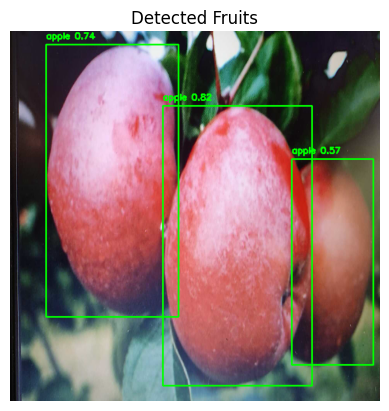


0: 640x640 3 apples, 253.2ms
Speed: 6.1ms preprocess, 253.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detected Apple, Height: 480, Width: 259
Color: red
Predicted weight: [     83.406]g

Detected Apple, Height: 354, Width: 144
Color: red
Predicted weight: [     102.15]g

Detected Apple, Height: 470, Width: 229
Color: red
Predicted weight: [      87.03]g



f:\projects\Final_Year_Project\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
f:\projects\Final_Year_Project\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
f:\projects\Final_Year_Project\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


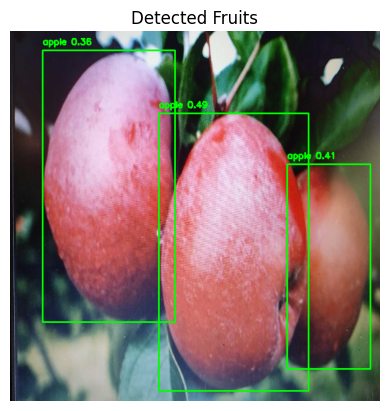


<< <> >>

Detected classes: ['apple', 'apple', 'apple', 'apple', 'apple', 'apple']
Predicted weights: [array([     83.287]), array([     86.974]), array([     102.34]), array([     83.406]), array([     102.15]), array([      87.03])]
Total estimated weight: [     545.19]g


array([     545.19])

In [45]:
images = Webcam_Video()
Weight_prediction(images)